In [4]:
%load_ext autoreload
%autoreload 2   

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import data_analysis as helper
from scipy.stats import norm
import statistics


In [6]:
us_data = helper.csv_to_dataframe('data/2020-elections-data.csv')
leading_digits_us = helper.find_all_leading_digits(us_data['votes'], 1)
russia_data = helper.csv_to_dataframe('data/2018-Russia-election-data.csv')
leading_digits_russia = helper.find_all_leading_digits(russia_data['votes'], 1)

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')


Text(0.5, 1.0, "Russia and US First Leading Digit Frequency Distribution Compared to Ideal Benford's Law")

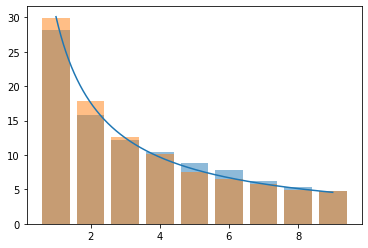

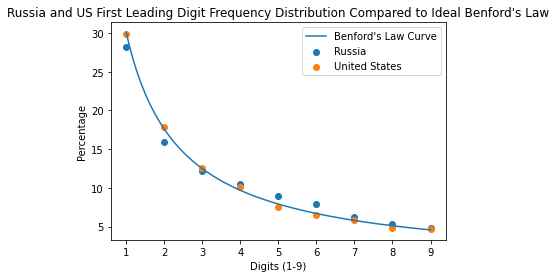

In [7]:
us_percentages = helper.data_to_percentage(leading_digits_us)
russia_percentages = helper.data_to_percentage(leading_digits_russia)
print(us_percentages.index)

ideal_values = helper.get_theoretical_benford_law_values(1000)

plt.bar(russia_percentages.index, russia_percentages, alpha=0.5)
plt.bar(us_percentages.index, us_percentages, alpha=0.5)

plt.plot(ideal_values.index, ideal_values)

plt.figure()

plt.scatter(russia_percentages.index, russia_percentages)
plt.scatter(us_percentages.index, us_percentages)

plt.plot(ideal_values.index, ideal_values)

plt.legend(["Benford's Law Curve",'Russia','United States'])
plt.xlabel('Digits (1-9)')
plt.ylabel('Percentage')
plt.title("Russia and US First Leading Digit Frequency Distribution Compared to Ideal Benford's Law")


(array([ 3.36227189, -1.0322877 ]), array([[ 0.08573876, -0.03951292],
       [-0.03951292,  0.05814545]]))


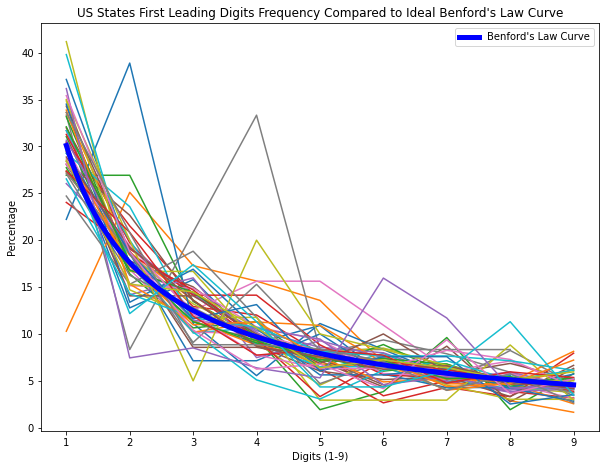

<Figure size 432x288 with 0 Axes>

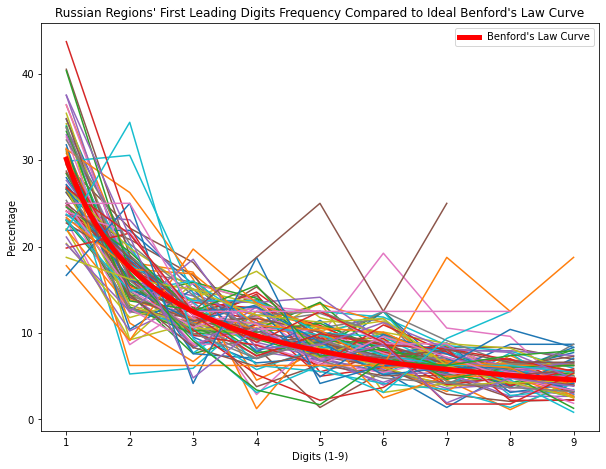

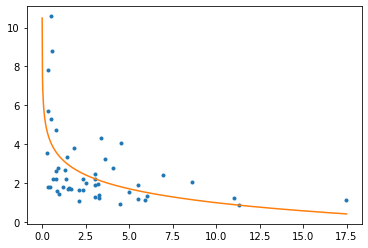

In [37]:
us_states_data = helper.get_votes_per_parameter(us_data, 3)
us_states_votes_sum = helper.sum_votes(us_data, 3) / 1000000
#us_states_leadings_digits = helper.find_all_leading_digits(us_states_data,1,)
#states_percentages = [helper.data_to_percentage(us_states_leadings_digits, state_names)]
# fig,axis = plt.subplots(nrows = 1, ncols = 1)
from scipy.optimize import curve_fit
import numpy as np

individual_state_percentages = {}
all_state_percentages = {1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}
us_states_std_dev = {}
plt.figure(figsize=(10,7.5))
for state in us_states_data.columns: 
    state_leading_digits = helper.find_all_leading_digits(us_states_data[state],1)
    state_percentages = helper.data_to_percentage(state_leading_digits)
    individual_state_percentages[state] = state_percentages
    for i in range(1,10):
        if i in state_percentages.index:
            all_state_percentages[i].append(state_percentages[i])
    us_states_std_dev[state] = helper.find_std_dev_to_ideal(state_percentages)
    plt.plot(state_percentages.index, state_percentages)
us_states_std_dev = pd.DataFrame(us_states_std_dev, index=[0])
individual_state_percentages = pd.DataFrame(individual_state_percentages)

plt.plot(ideal_values.index, ideal_values, linewidth=5.0, color = 'b', label = "Benford's Law Curve")

plt.legend()
plt.xlabel('Digits (1-9)')
plt.ylabel('Percentage')
plt.title("US States First Leading Digits Frequency Compared to Ideal Benford's Law Curve")

#Russia
plt.figure()

russia_region_data = helper.get_votes_per_parameter(russia_data, 2)
russia_region_votes_sum = helper.sum_votes(russia_data, 2) / 1000000

individual_region_percentages = {}
all_region_percentages = {1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}
russia_region_std_dev = {}
plt.figure(figsize=(10,7.5))
for region in russia_region_data.columns: 
    region_leading_digits = helper.find_all_leading_digits(russia_region_data[region],1)
    region_percentages = helper.data_to_percentage(region_leading_digits)
    individual_region_percentages[region] = region_percentages
    for i in range(1,10):
        if i in region_percentages.index:
            all_region_percentages[i].append(region_percentages[i])
    russia_region_std_dev[state] = helper.find_std_dev_to_ideal(region_percentages)
    plt.plot(region_percentages.index, region_percentages)
russia_region_std_dev = pd.DataFrame(russia_region_std_dev, index=[0])
individual_region_percentages = pd.DataFrame(individual_region_percentages)

plt.plot(ideal_values.index, ideal_values, linewidth=5.0, color = 'r', label = "Benford's Law Curve")

plt.xlabel('Digits (1-9)')
plt.ylabel('Percentage')
plt.title("Russian Regions' First Leading Digits Frequency Compared to Ideal Benford's Law Curve")
plt.legend()
#plt.legend(["Benford's Law Curve"]).set_color('red')


plt.figure()
plt.plot(us_states_votes_sum.iloc[0], us_states_std_dev.iloc[0], '.')
values = curve_fit(lambda t, a, b: a+b*np.log(t), us_states_votes_sum.iloc[0], us_states_std_dev.iloc[0])
print(values)
pop_values = np.linspace(.001, 17.5, 1000)
plt.plot(pop_values, values[0][0] + values[0][1] * np.log(pop_values))

state_percentages = pd.DataFrame({index: pd.Series(value) for index,value in all_state_percentages.items()})


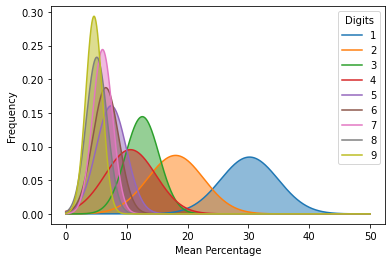

In [9]:
us_standard_deviations = {}

us_means = state_percentages.mean(axis = 0, skipna = True)
us_standard_deviations = state_percentages.std(axis = 0,skipna = True, ddof = 0)

#plotting normal distribution for each digit for US: 

x = np.arange(0,50, 0.01)

for digit in range(1,10):
    plt.plot(x, norm.pdf(x, us_means.loc[digit], us_standard_deviations.loc[digit]))
    plt.fill_between(x, norm.pdf(x, us_means.loc[digit], us_standard_deviations.loc[digit]), alpha = 0.5)
    
plt.legend(['1','2','3','4','5','6','7','8','9'], title = 'Digits')
plt.xlabel("Mean Percentage")
plt.ylabel("Frequency")

plt.show()

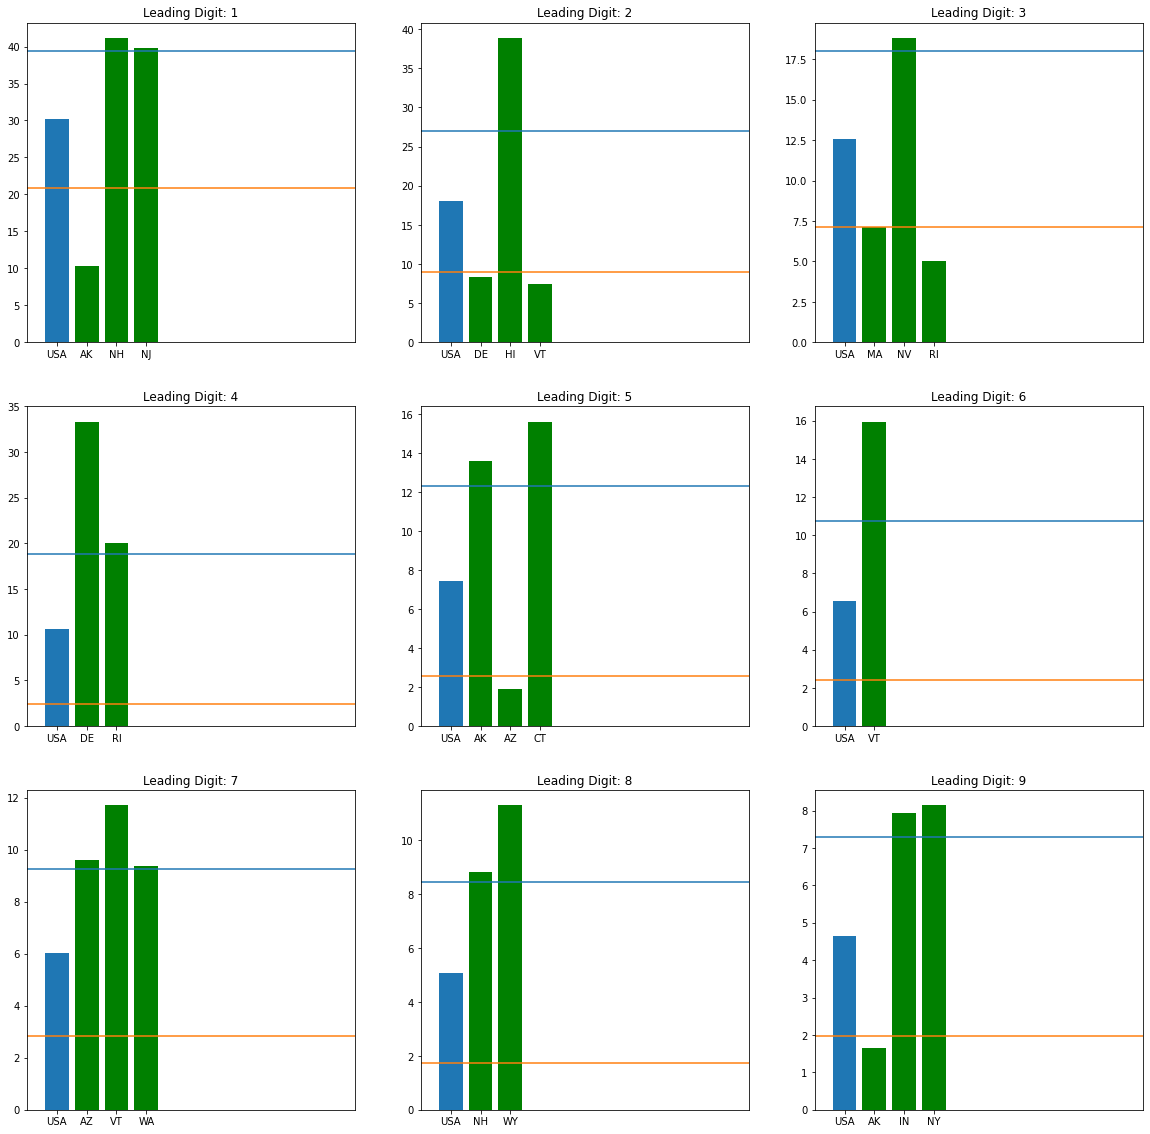

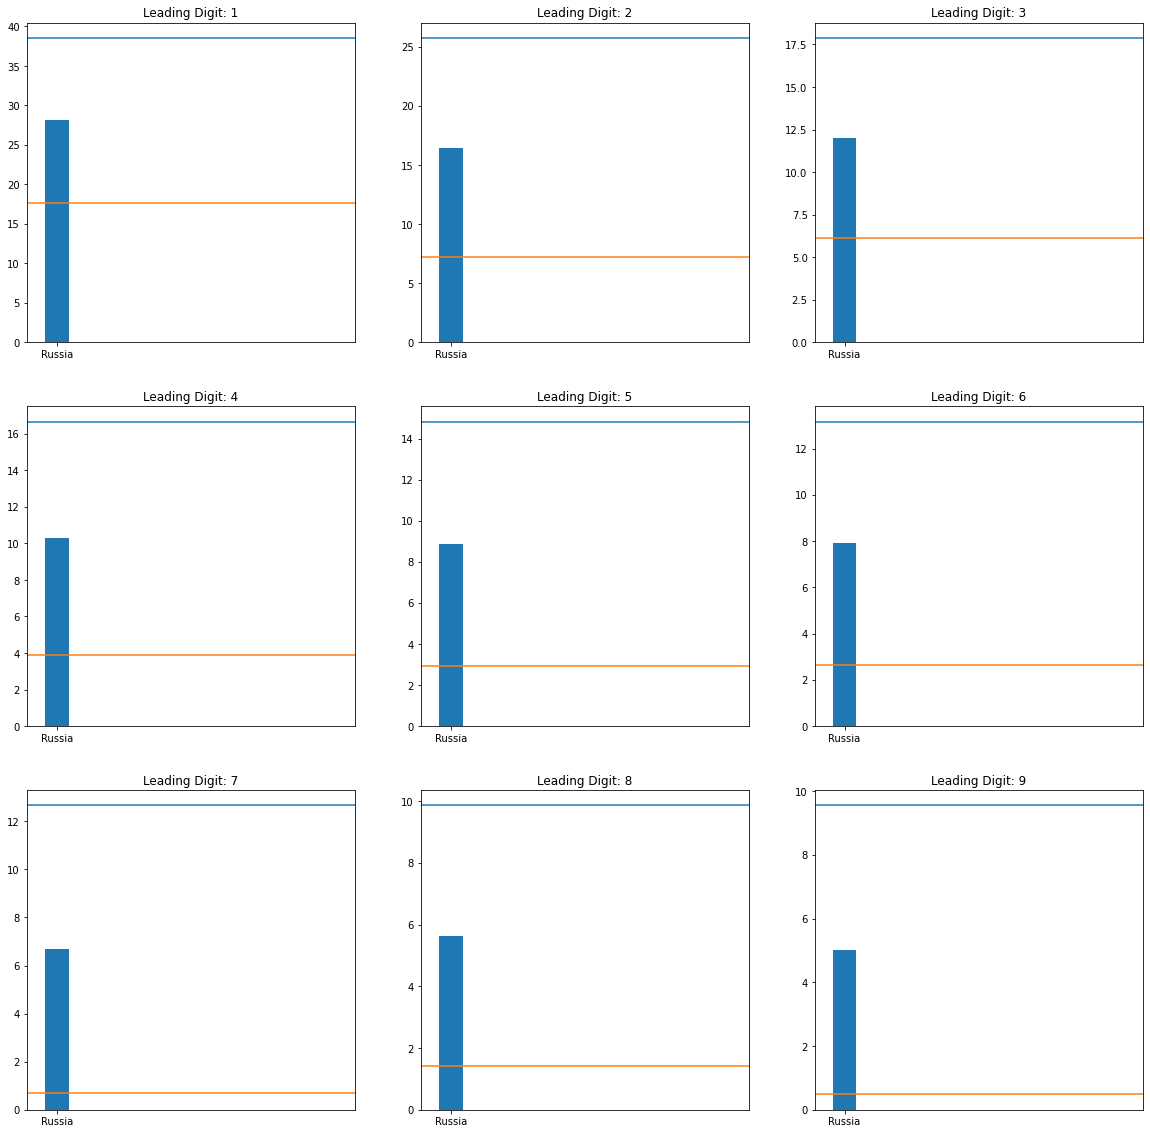

In [12]:
max_val = pd.Series([mean + 1.96 * std_dev for mean, std_dev in zip(us_means, us_standard_deviations)], index=(1,2,3,4,5,6,7,8,9))
min_val = pd.Series([mean - 1.96 * std_dev for mean, std_dev in zip(us_means, us_standard_deviations)], index=(1,2,3,4,5,6,7,8,9))
values_outside_std_dev = {}
for state, values in individual_state_percentages.items():
    for i in range(1, 10):
        if values[i] > max_val[i] or values[i] < min_val[i]:
            values_outside_std_dev[(i, state)] = values[i]
x = np.arange(-1, 20, 1)

fig, axs = plt.subplots(3, 3, figsize=(20, 20))
for i, ax in enumerate(fig.axes):
    # ax.set_ylim([0, 50])
    ax.set_xlim([-1, 10])
    ax.set_title(f"Leading Digit: {i + 1}")
    ax.bar("USA", us_means[i + 1])
    ax.plot(x, [max_val[i + 1]] * len(x))
    ax.plot(x, [min_val[i + 1]] * len(x))
    for key in values_outside_std_dev:
        if key[0] == (i + 1):
            ax.bar(key[1], values_outside_std_dev[key], color="green")


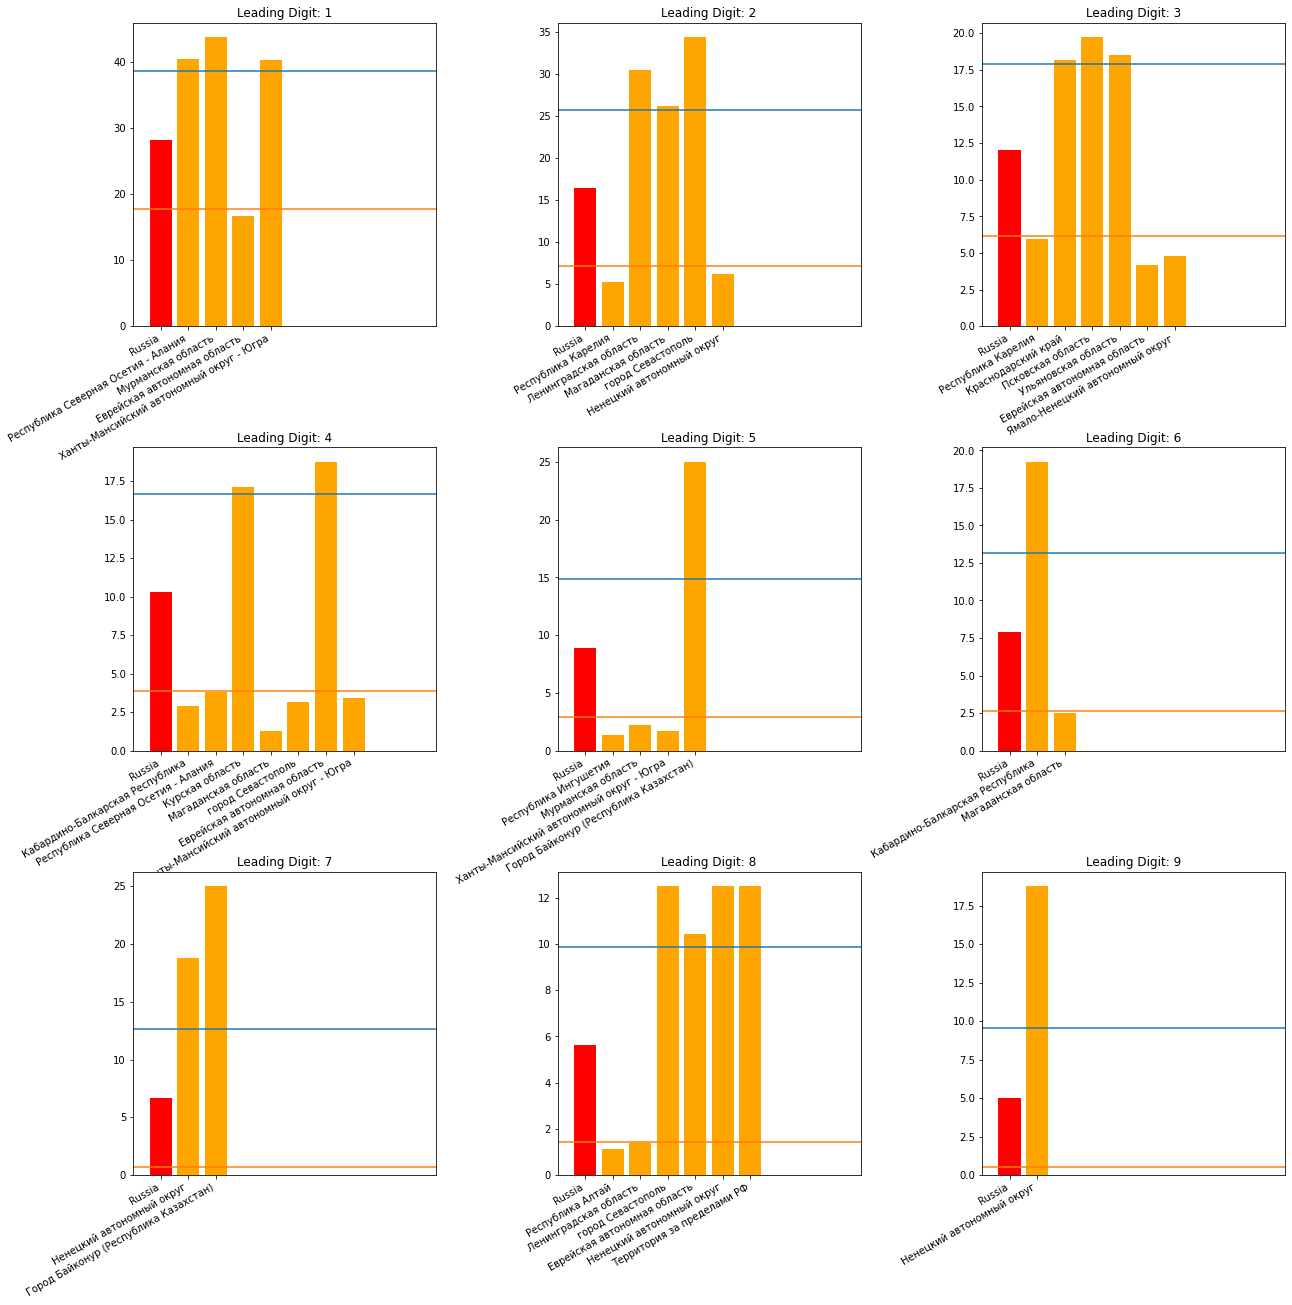

In [30]:
#Russia

region_percentages = pd.DataFrame({index: pd.Series(value) for index,value in all_region_percentages.items()})

russia_means = region_percentages.mean(axis = 0, skipna = True)
russia_standard_deviations = region_percentages.std(axis = 0,skipna = True, ddof = 0)


max_val = pd.Series([mean + (1.96 * std_dev) for mean, std_dev in zip(russia_means, russia_standard_deviations)], index=(1,2,3,4,5,6,7,8,9))
min_val = pd.Series([mean - (1.96 * std_dev) for mean, std_dev in zip(russia_means, russia_standard_deviations)], index=(1,2,3,4,5,6,7,8,9))
values_outside_std_dev = {}
for region, values in individual_region_percentages.items():
    for i in range(1, 10):
        if i in values and (values[i] > max_val[i] or values[i] < min_val[i]):
            values_outside_std_dev[(i, region)] = values[i]
x = np.arange(-1, 20, 1)

fig, axs = plt.subplots(3, 3, figsize=(20, 20))
for i, ax in enumerate(fig.axes):
    # ax.set_ylim([0, 50])
    ax.set_xlim([-1, 10])
    ax.set_title(f"Leading Digit: {i + 1}")
    ax.bar("Russia", russia_means[i + 1],color = 'red')
    ax.plot(x, [max_val[i + 1]] * len(x))
    ax.plot(x, [min_val[i + 1]] * len(x))
    for key in values_outside_std_dev:
        if key[0] == (i + 1):
            ax.bar(key[1], values_outside_std_dev[key], color="orange")

    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)


Text(0.5, 1.0, "Russian Candidates First Leading Digits Frequency Compared to Ideal Benford's Law Curve")

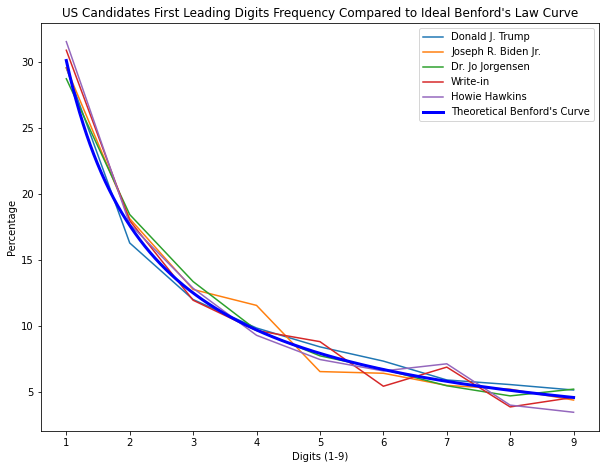

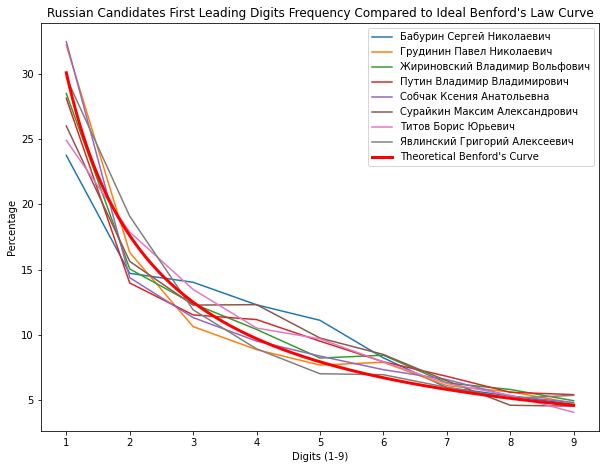

In [45]:
us_cand_data = helper.get_votes_per_parameter(us_data, 0)
russia_cand_data = helper.get_votes_per_parameter(russia_data, 0)

total_us_candidate_votes = helper.sum_votes(us_data, 0)
total_us_votes = total_us_candidate_votes.iloc[0].sum()

total_russia_candidate_votes = helper.sum_votes(russia_data, 0)
total_russia_votes = total_russia_candidate_votes.iloc[0].sum()

us_percentage_of_total_votes = total_us_candidate_votes.divide(total_us_votes)
russia_percentage_of_total_votes = total_russia_candidate_votes.divide(total_russia_votes)

us_candidates_combined_leading_digit_std_dev = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}
russia_candidates_combined_leading_digit_std_dev = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}
plt.figure(figsize=(10,7.5))
plt.clf()
for cand, votes in us_cand_data.items(): 
    cand_leading_digits = helper.find_all_leading_digits(votes,1)
    cand_percentages = helper.data_to_percentage(cand_leading_digits)
    if len(votes[~np.isnan(votes)]) > 500:
        plt.plot(cand_percentages.index, cand_percentages, label=cand)
        for i in range(1, 10):
            if i in cand_percentages.index:
                us_candidates_combined_leading_digit_std_dev[i].append(cand_percentages[i])
us_candidates_combined_leading_digit_std_dev = pd.DataFrame({index: pd.Series(value) for index, value in us_candidates_combined_leading_digit_std_dev.items()})
plt.plot(ideal_values.index, ideal_values, linewidth=3.0, color="blue", label="Theoretical Benford's Curve")
plt.legend()

plt.xlabel('Digits (1-9)')
plt.ylabel('Percentage')
plt.title("US Candidates First Leading Digits Frequency Compared to Ideal Benford's Law Curve")

plt.figure(figsize=(10,7.5))

for cand, votes in russia_cand_data.items(): 
    cand_leading_digits = helper.find_all_leading_digits(votes,1)
    cand_percentages = helper.data_to_percentage(cand_leading_digits)
    if len(votes[~np.isnan(votes)]) > 500:
        plt.plot(cand_percentages.index, cand_percentages, label=cand)
        for i in range(1, 10):
            if i in cand_percentages.index:
                russia_candidates_combined_leading_digit_std_dev[i].append(cand_percentages[i])
russia_candidates_combined_leading_digit_std_dev = pd.DataFrame({index: pd.Series(value) for index, value in russia_candidates_combined_leading_digit_std_dev.items() if len(value) > 500})
plt.plot(ideal_values.index, ideal_values, linewidth=3.0, color="red", label="Theoretical Benford's Curve")
plt.legend()

plt.xlabel('Digits (1-9)')
plt.ylabel('Percentage')
plt.title("Russian Candidates First Leading Digits Frequency Compared to Ideal Benford's Law Curve")



In [120]:
plt.figure(figsize=(10,7.5))
plt.clf()

us_cand_std_dev = {}
for cand, votes in us_cand_data.items(): 
    cand_leading_digits = helper.find_all_leading_digits(votes,1)
    cand_percentages = helper.data_to_percentage(cand_leading_digits)
    if len(votes[~np.isnan(votes)]) > 500:
        us_cand_std_dev[cand] = helper.find_std_dev_to_ideal(cand_percentages)
us_cand_std_dev = pd.DataFrame({index: pd.Series(value) for index, value in us_cand_std_dev.items()})

russia_cand_std_dev = {}
for cand, votes in russia_cand_data.items(): 
    cand_leading_digits = helper.find_all_leading_digits(votes,1)
    cand_percentages = helper.data_to_percentage(cand_leading_digits)
    if len(votes[~np.isnan(votes)]) > 500:
        russia_cand_std_dev[cand] = helper.find_std_dev_to_ideal(cand_percentages)
russia_cand_std_dev = pd.DataFrame({index: pd.Series(value) for index, value in russia_cand_std_dev.items()})

<Figure size 720x540 with 0 Axes>

Text(0.5, 95.0, 'Number of Votes (tens of millions)')

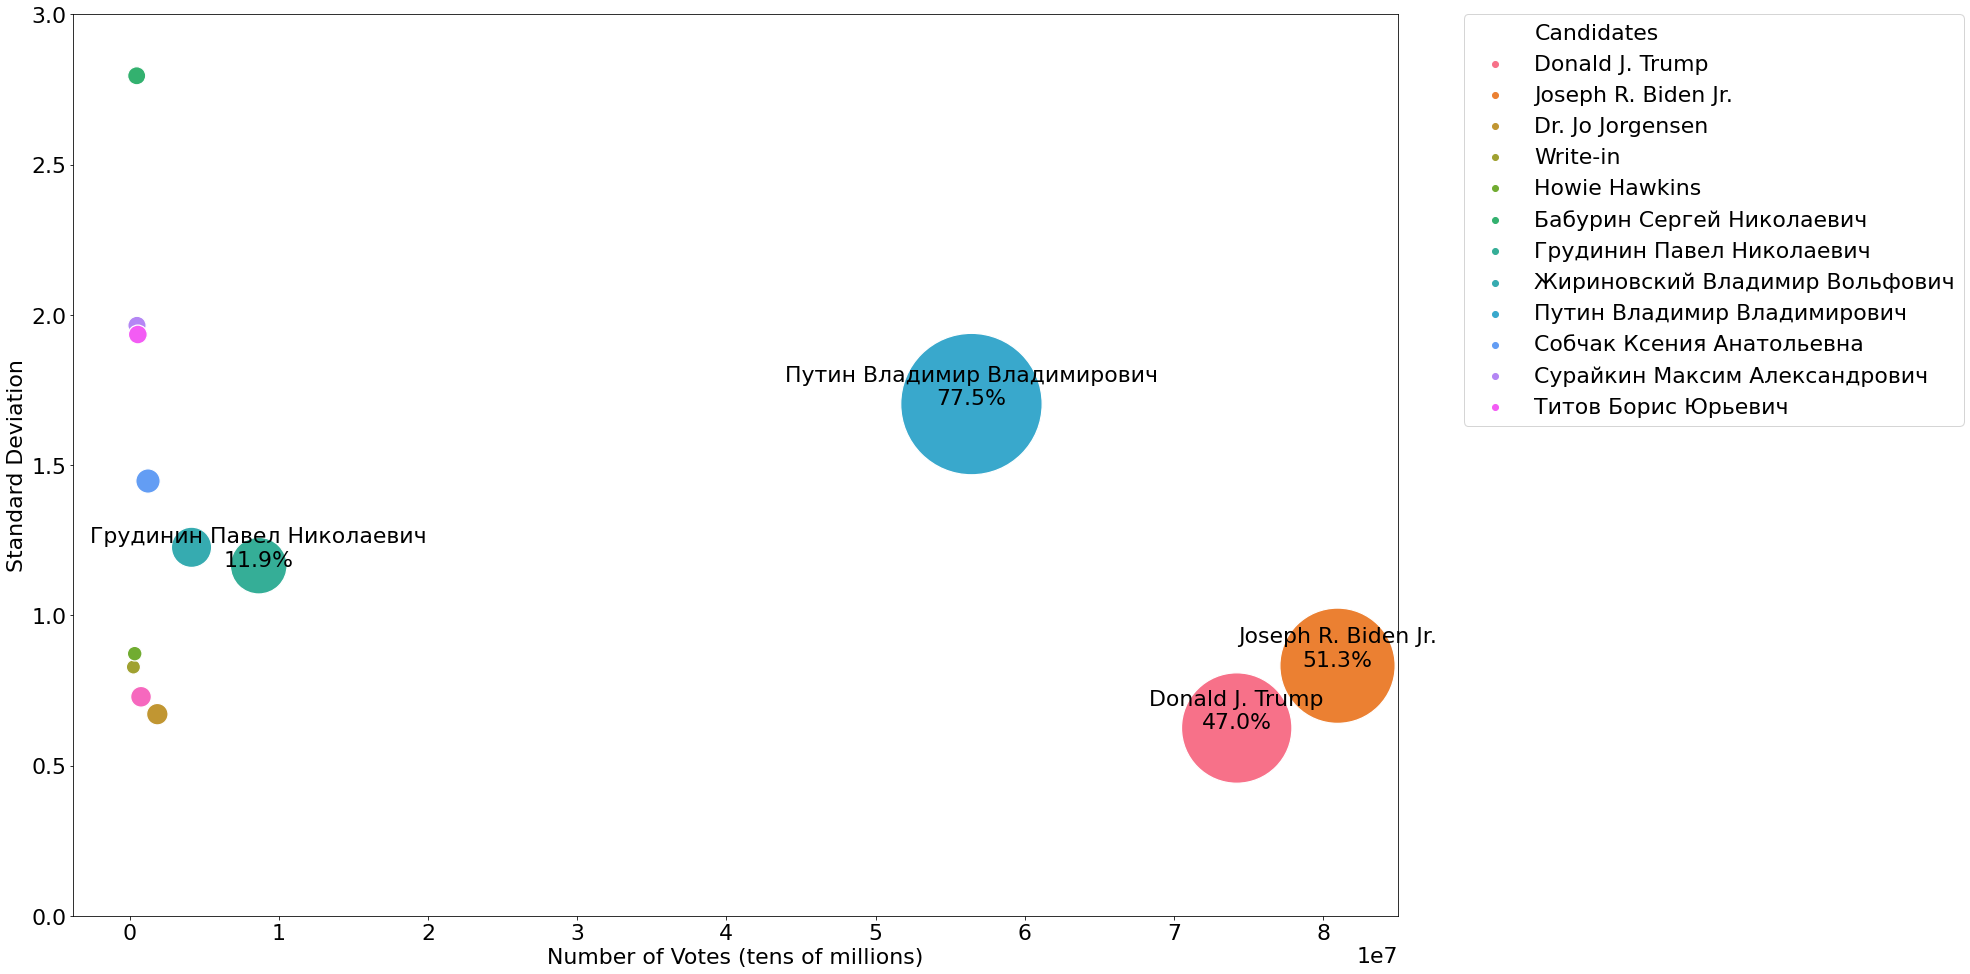

In [131]:
import seaborn as sns

us_total_percent_votes = pd.DataFrame({index:value for index, value in us_percentage_of_total_votes.items() if index in us_cand_std_dev.columns})

russia_total_percent_votes = pd.DataFrame({index:value for index, value in russia_percentage_of_total_votes.items() if index in russia_cand_std_dev.columns})

total_us_candidate_votes = pd.DataFrame({index:value for index, value in total_us_candidate_votes.items() if index in us_cand_std_dev.columns})

total_russia_candidate_votes = pd.DataFrame({index:value for index, value in total_russia_candidate_votes.items() if index in russia_cand_std_dev.columns})

data = pd.DataFrame({"Candidates": list(us_cand_std_dev.columns) + list(russia_cand_std_dev.columns),
                    "Percentage of Total Votes in Country": list(us_total_percent_votes.iloc[0]) + list(russia_percentage_of_total_votes.iloc[0]),
                    "Number Votes": list(total_us_candidate_votes.iloc[0]) + list(total_russia_candidate_votes.iloc[0]),
                    "Standard Deviation": list(us_cand_std_dev.iloc[0]) + list(russia_cand_std_dev.iloc[0])})
plt.figure(figsize=(28, 14))
ax = sns.scatterplot(data=data, x="Number Votes", y="Standard Deviation", size="Percentage of Total Votes in Country", sizes=(200,20000), hue="Candidates")
ax.set_ylim([0, 3])
for line in range(0, data.shape[0]):
    if data["Percentage of Total Votes in Country"][line] > .1:
        display_value = f'{data["Candidates"][line]}\n{(round(data["Percentage of Total Votes in Country"][line], 3) * 100):.1f}%'
        ax.text(data["Number Votes"][line], data["Standard Deviation"][line], display_value, horizontalalignment='center')

h,l = ax.get_legend_handles_labels()
plt.legend(h[0:13],l[0:13],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()

ax.set_xlabel("Number of Votes (tens of millions)")

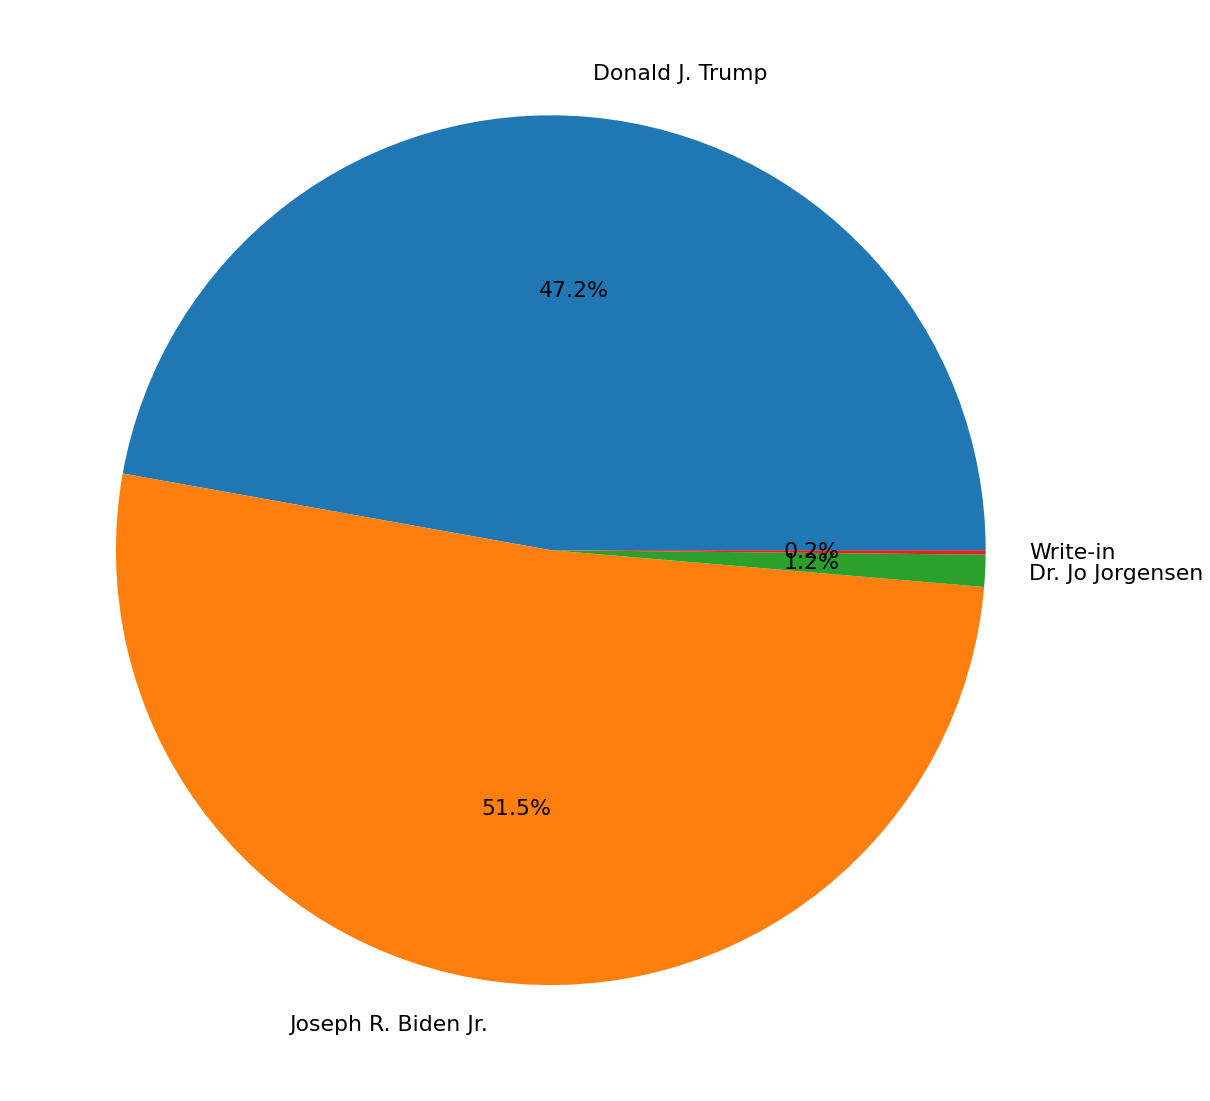

In [123]:
plt.figure(figsize=(40, 20))
data["Candidates"]
plt.pie(data["Percentage Total"][:4], normalize=True, labels=data["Candidates"][:4], autopct="%1.1f%%")
plt.rcParams.update({'font.size': 22})

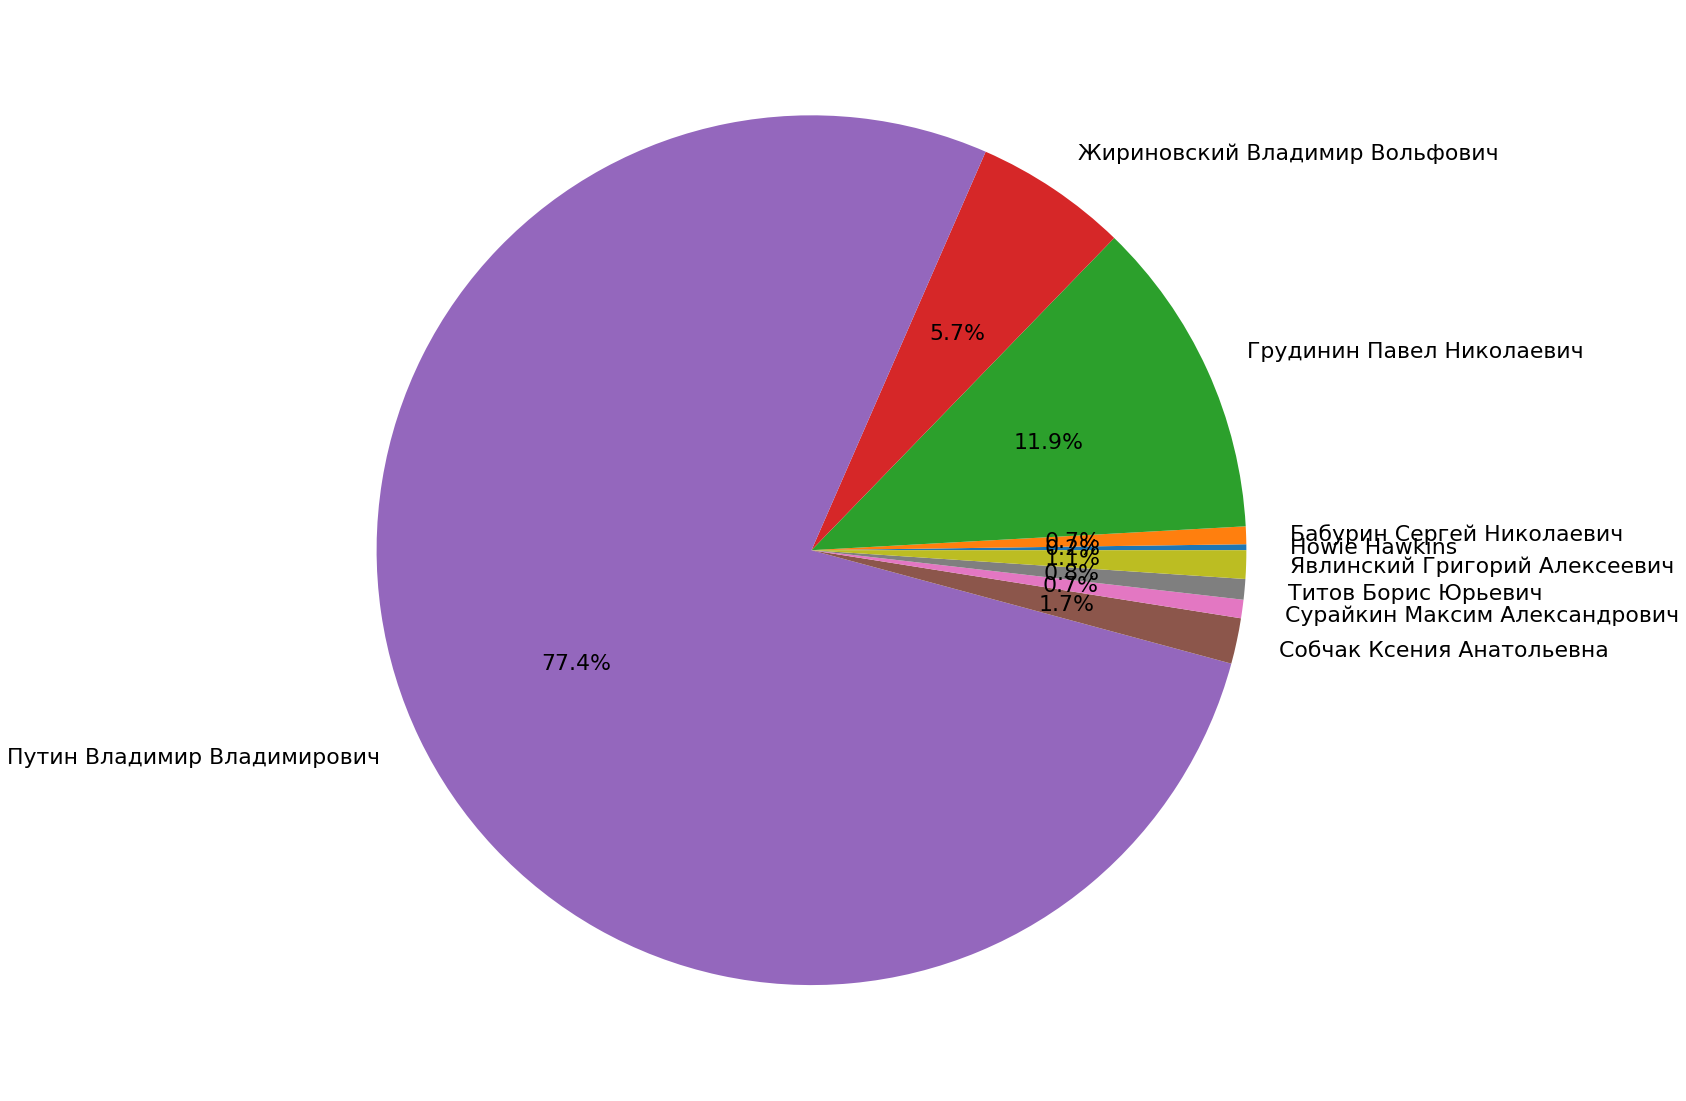

In [124]:
plt.figure(figsize=(40, 20))
data["Candidates"]
plt.pie(data["Percentage Total"][4:], normalize=True, labels=data["Candidates"][4:], autopct="%1.1f%%")
plt.rcParams.update({'font.size': 22})